# Python Audio Libraries
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [audio_libraries.ipynb](https://github.com/diegoinacio/computer-vision-notebooks/blob/master/Digital-Signal-Processing/audio_libraries.ipynb)
---
Brief overview about some of the main python libraries which promote input and output of digital audio files.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np

from _utils import *

## 1. Scipy
---
Reading and writing audio files using [SciPy](https://www.scipy.org/).

### 1.1. Installation
---
Install by command line:
``` python
>>> conda install scipy
```
or
``` python
>>> pip install scipy
```

### 1.2. Input
---

In [2]:
from scipy.io import wavfile

In [3]:
%%time
try:
    fs, x_scipy = wavfile.read('../_data/A4_cello01.wav')
    x_scipy = x_scipy.astype(np.float32)
    x_scipy /= np.abs(x_scipy).max(axis=0)
except:
    print('Can not load audio!')

Wall time: 26 ms


audio stereo


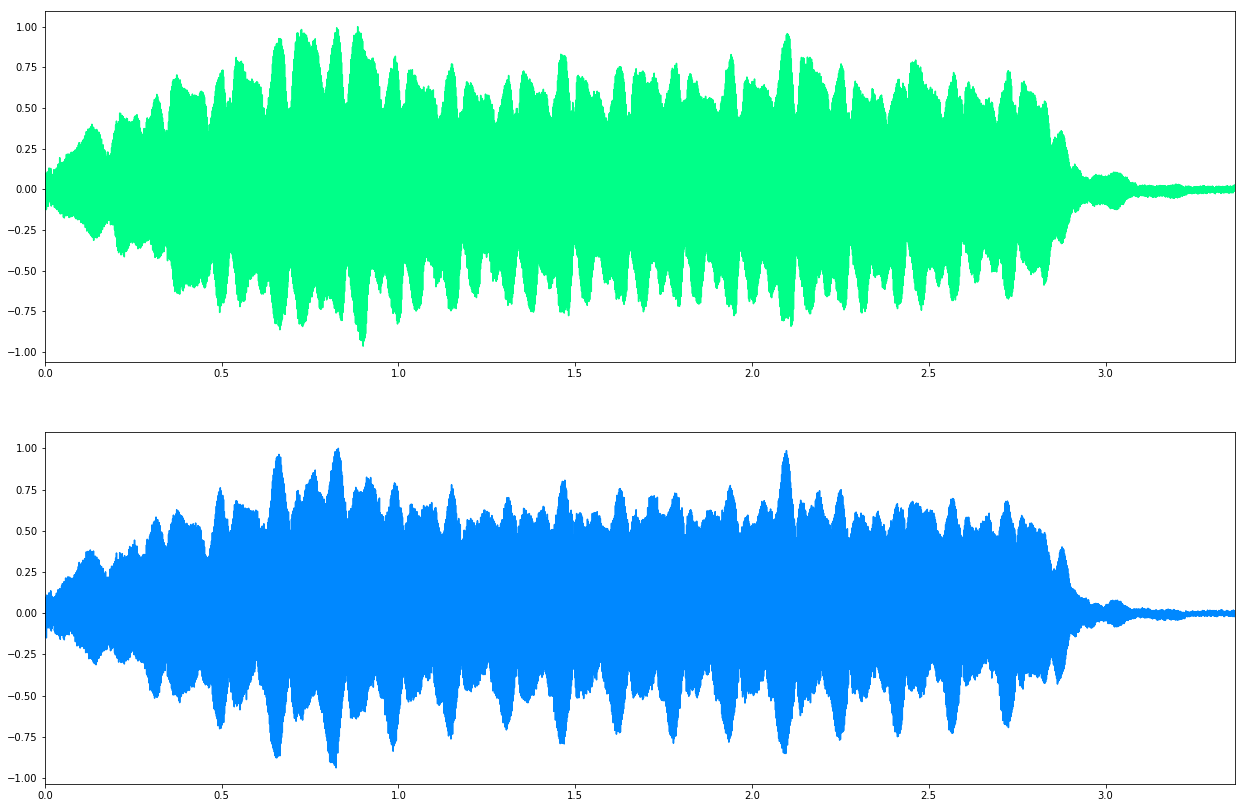

In [4]:
audiovis(x_scipy, fs)

In [5]:
Audio(x_scipy.min(axis=1), rate=fs)

### 1.3. Analysis
---

In [6]:
summary(x_scipy)

                          L               R
       min:         -0.9645         -0.9377
  1st Quar:         -0.2134         -0.1654
    median:         -0.0060         -0.0115
      mean:         -0.0017         -0.0016
  3rd Quar:          0.1955          0.1379
       max:          1.0000          1.0000
     sigma:          0.3149          0.2663


audio stereo


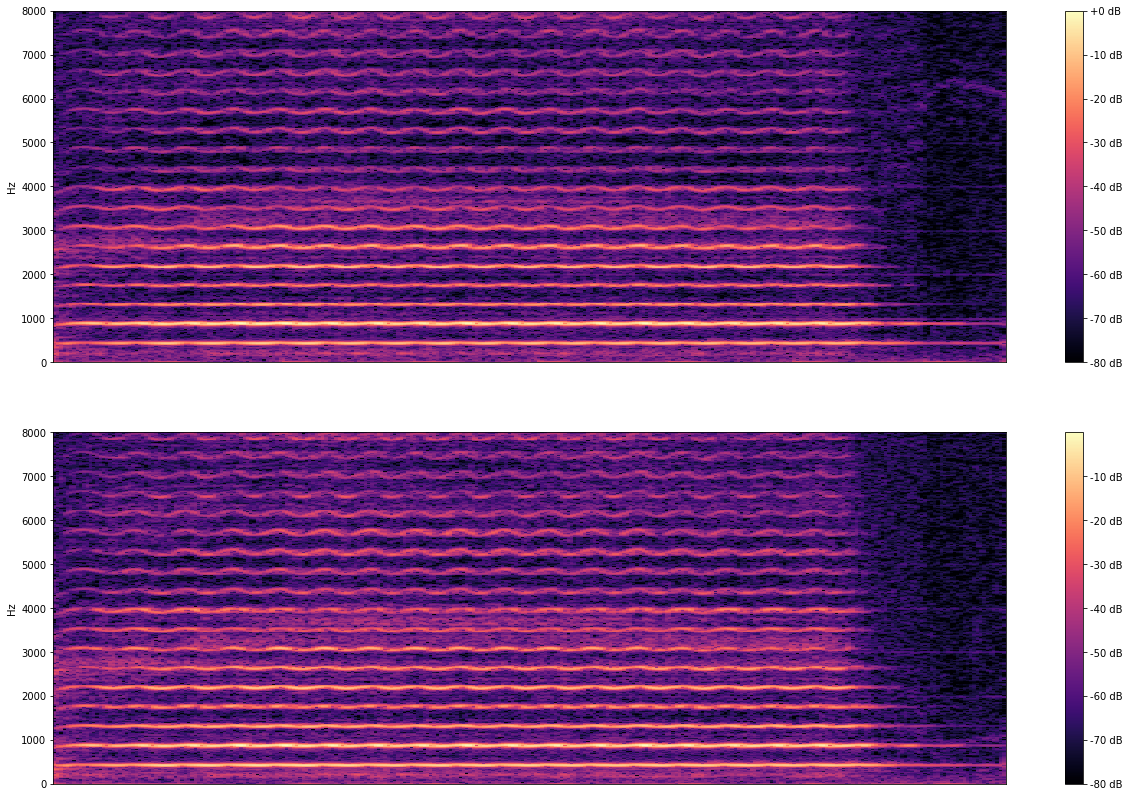

Wall time: 1.21 s


In [7]:
%%time
spectrogram(x_scipy, fs=fs, ws=2048)

### 1.4. Output
---

In [8]:
#wavfile.write('_output/audio_scipy.wav', fs, x_scipy)

## 2. pySoundFile
---
Reading and writing audio files using [pySoundFile](https://pysoundfile.readthedocs.io).

### 2.1. Installation
---
Install by command line:
``` python
>>> conda install -c conda-forge pysoundfile
```
or
``` python
>>> pip install pysoundfile
```

### 2.2. Input
---

In [9]:
import soundfile

In [10]:
%%time
try:
    x_soundfile, fs = soundfile.read('../_data/A4_cello01.wav')
except:
    print('Can not load audio!')

Wall time: 9.99 ms


audio stereo


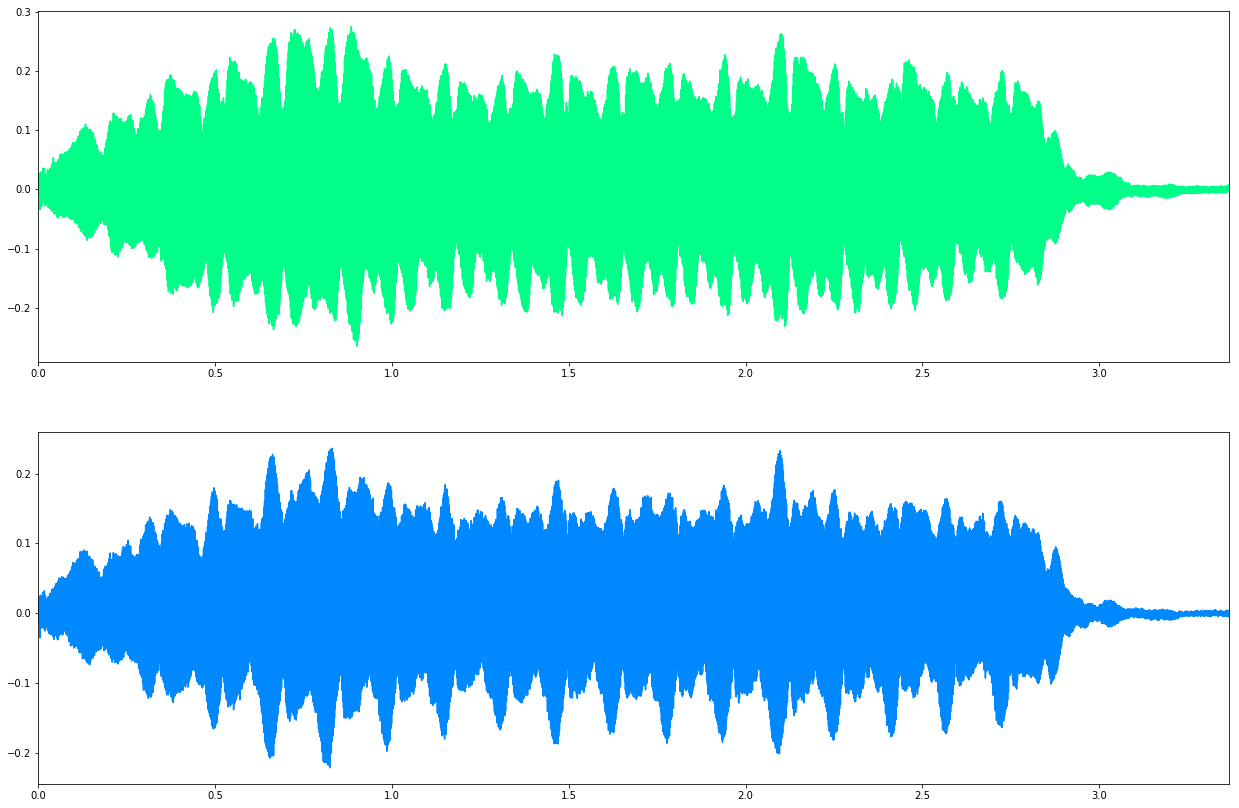

In [11]:
audiovis(x_soundfile, fs)

In [12]:
Audio(x_soundfile.min(axis=1), rate=fs)

### 2.3. Analysis
---

In [13]:
summary(x_soundfile)

                          L               R
       min:         -0.2648         -0.2215
  1st Quar:         -0.0586         -0.0391
    median:         -0.0016         -0.0027
      mean:         -0.0005         -0.0004
  3rd Quar:          0.0537          0.0326
       max:          0.2745          0.2362
     sigma:          0.0865          0.0629


audio stereo


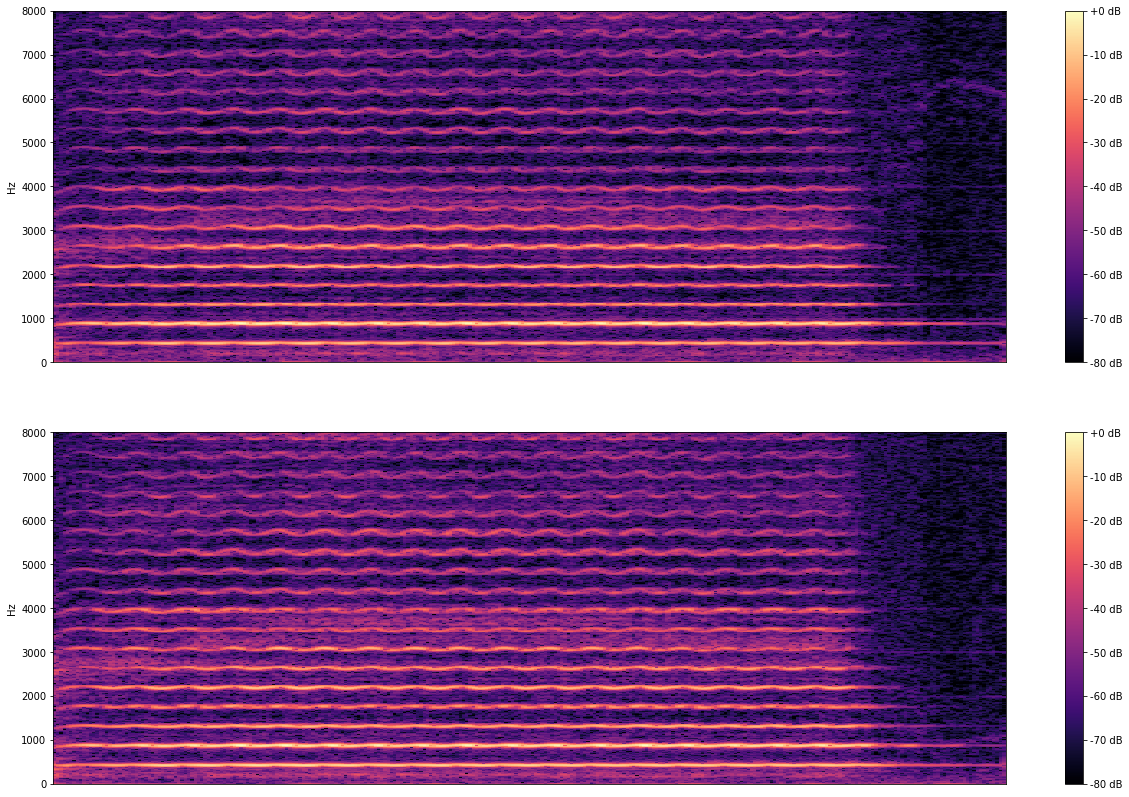

Wall time: 1.4 s


In [14]:
%%time
spectrogram(x_soundfile)

### 2.4. Output
---

In [15]:
#soundfile.write('_output/audio_soundfile.wav', x_soundfile, fs)

## 3. LibROSA
---
Reading and writing audio files using [LibROSA](http://librosa.github.io/librosa/).

### 3.1. Installation
---
Install by command line:
``` python
>>> conda install -c conda-forge librosa
```
or
``` python
>>> pip install librosa
```

### 3.2. Input
---

In [16]:
import librosa

In [17]:
%%time
try:
    x_librosa, fs = librosa.load('../_data/A4_cello01.wav', mono=False)
    x_librosa = x_librosa.T
except:
    print('Can not load audio!')

Wall time: 704 ms


audio stereo


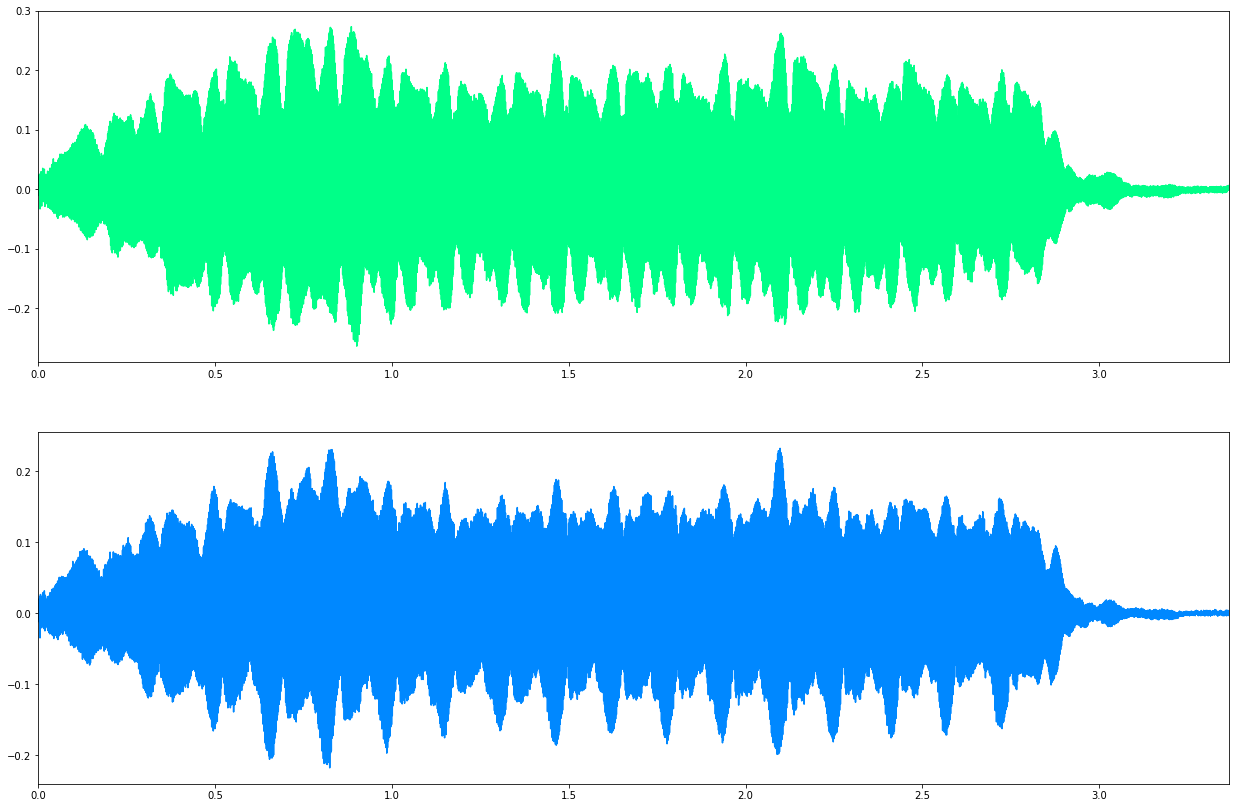

In [18]:
audiovis(x_librosa, fs)

### 3.3. Analysis
---

In [19]:
summary(x_librosa)

                          L               R
       min:         -0.2633         -0.2182
  1st Quar:         -0.0585         -0.0390
    median:         -0.0017         -0.0028
      mean:         -0.0005         -0.0004
  3rd Quar:          0.0536          0.0326
       max:          0.2729          0.2319
     sigma:          0.0865          0.0629


audio stereo


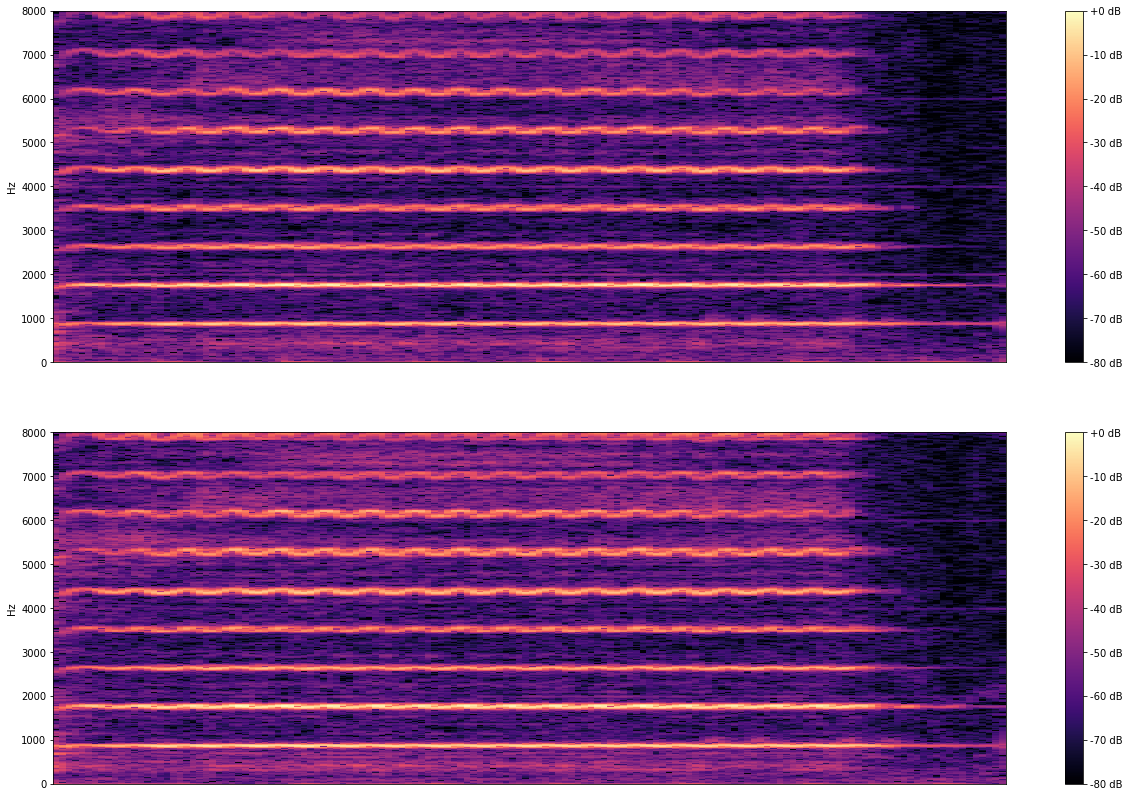

Wall time: 822 ms


In [20]:
%%time
spectrogram(x_librosa)

### 3.4. Saída
---

In [21]:
#librosa.output.write_wav('_output/audio_librosa.wav', x_librosa, fs)